# Лабороторна робота 2
# Використання Pandas для аналізу даних
## Мета: Вивчення основних функцій Pandas для аналізу даних
## Варіант:

In [3]:
(2 + 4) % 5 + 1

2

3. Отримайте імена стовпців набору даних

In [3]:
import pandas as pd

file_path = 'NationalNames.csv'

file = pd.read_csv(file_path)

columns = file.columns
columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

4. Отримайте загальну інформацію про дані у наборі даних

In [11]:
file.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


5. Знайдіть кількість унікальних імен у наборі даних

In [11]:
file['Name'].nunique()

93889

8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого 
Count максимальне)

In [16]:
year = 2013
name = file[file['Year'] == year].sort_values(by='Count', ascending=False).iloc[0]['Name']

f"The name is {name} in {year}"

'The name is Sophia in 2013'

9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [17]:
min_count = file['Count'].min()
file[file['Count'] == min_count].shape[0]

254615

11. Знайдіть рік із найбільшою кількістю унікальних імен

In [18]:
unique_names_per_year = file.groupby('Year')['Name'].nunique()
year_with_max_unique_names = unique_names_per_year.idxmax()
unique_names_per_year.max()

np.int64(32488)

12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних 
імен (тобто у 2008 році)

In [22]:
file_2008 = file[file['Year'] == 2008]

file_2008.loc[file_2008['Count'].idxmax()]['Name']

'Jacob'

13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [18]:
jacob_female = file[(file['Name'] == 'Jacob') & (file['Gender'] == 'F')]

most_popular_year = jacob_female.loc[jacob_female['Count'].idxmax()]

print(pd.DataFrame([most_popular_year]).to_string())

              Id   Name  Year Gender  Count
1455556  1455557  Jacob  2004      F    171


14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові 
чоловічі та жіночі імена)


In [26]:
gender_count = file.groupby(['Name', 'Year'])['Gender'].nunique().reset_index()
gender_neutral = gender_count[gender_count['Gender'] > 1]
gender_neutral_per_year = gender_neutral.groupby('Year').size().reset_index(name='Gender_neutral_names')
most_gender_neutral_year = gender_neutral_per_year.loc[gender_neutral_per_year['Gender_neutral_names'].idxmax()]
print(most_gender_neutral_year.to_frame().T.to_string(index=False))

 Year  Gender_neutral_names
 2008                  2557


16. Знайдіть рік, коли народилося найбільше дітей

In [40]:
total_births_per_year = file.groupby('Year')['Count'].sum().reset_index()
print(total_births_per_year.loc[total_births_per_year['Count'].idxmax()]['Year'])

1957


17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [27]:
gender_count_per_year = file.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_count_per_year.head().to_string())

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж 
хлопчиків

In [29]:
years_more_girls_than_boys = (gender_count_per_year['F'] > gender_count_per_year['M']).sum()
print(years_more_girls_than_boys)

54


19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на 
рік

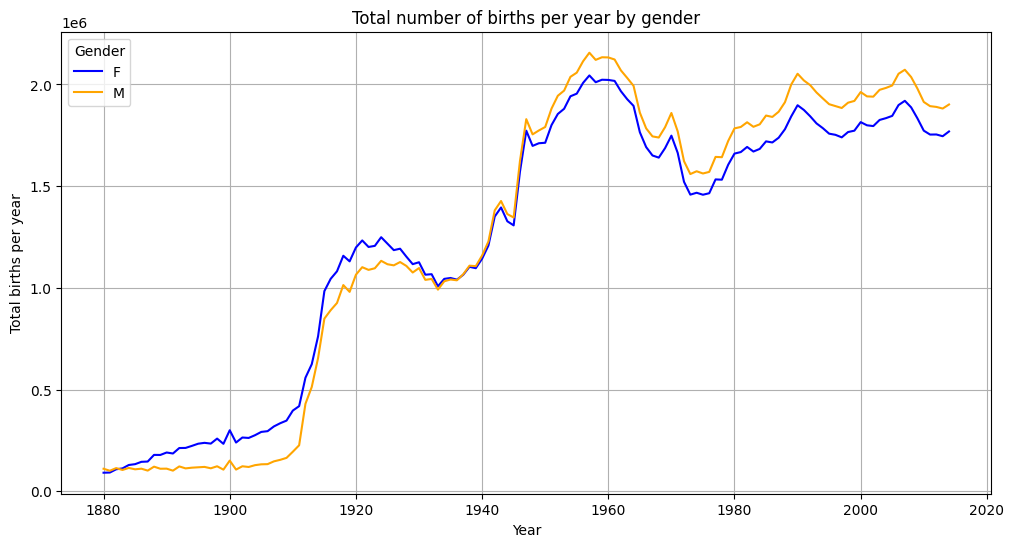

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gender_count_per_year.index, gender_count_per_year['F'], label='F', color='blue')
plt.plot(gender_count_per_year.index, gender_count_per_year['M'], label='M', color='orange')
plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.title('Total number of births per year by gender')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

22. Підрахуйте скільки років проводилось спостереження

In [31]:
unique_years_count = file['Year'].nunique()
print(f"Спостереження проводилось {unique_years_count} років")

Спостереження проводилось 135 років


23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні 
кожного року)

In [38]:
popular_gender_neutral_names = file[file['Name'].isin(gender_neutral_names)].groupby('Name')['Count'].sum().sort_values(ascending=False)
print(popular_gender_neutral_names.head(15).index.to_frame(index=False).to_string(index=False))

       Name
      James
       John
     Robert
    Michael
       Mary
    William
      David
     Joseph
    Richard
    Charles
     Thomas
Christopher
     Daniel
  Elizabeth
   Patricia


24. Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, 
яким називали дітей найбільшу кількість разів)

In [40]:
name_counts = file.groupby('Name')['Count'].sum()
min_count = name_counts.min()
least_used_names = name_counts[name_counts == min_count]
most_popular_of_least_used_name = least_used_names.idxmax()
most_popular_of_least_used_count = least_used_names.max()
print(f"Наиболее популярное из непопулярных имен - это {most_popular_of_least_used_name}. Им называли {most_popular_of_least_used_count} раз")

Наиболее популярное из непопулярных имен - это Aabid. Им называли 5 раз


27. Знайти найпопулярніші імена в кожному році

In [43]:
most_popular_names_per_year = file.loc[file.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
most_popular_names_per_year.set_index('Year', inplace=True)
print(most_popular_names_per_year.to_string())

          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
1885      Mary   9128
1886      Mary   9890
1887      Mary   9888
1888      Mary  11754
1889      Mary  11648
1890      Mary  12078
1891      Mary  11703
1892      Mary  13173
1893      Mary  12784
1894      Mary  13151
1895      Mary  13446
1896      Mary  13811
1897      Mary  13413
1898      Mary  14406
1899      Mary  13172
1900      Mary  16707
1901      Mary  13136
1902      Mary  14486
1903      Mary  14275
1904      Mary  14962
1905      Mary  16067
1906      Mary  16370
1907      Mary  17580
1908      Mary  18666
1909      Mary  19259
1910      Mary  22848
1911      Mary  24390
1912      Mary  32303
1913      Mary  36641
1914      Mary  45344
1915      Mary  58187
1916      Mary  61437
1917      Mary  64280
1918      Mary  67370
1919      Mary  65840
1920      Mary  70976
1921      Mary  73985
1922      Mary  72171
1923      